In [1]:
#!pip install fiftyone

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz
from IPython import display
from numpy import load, asarray, zeros, ones, savez_compressed
import PIL
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fo.config.dataset_zoo_dir = "F:\coco"

In [4]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    max_samples=10000,
    classes=["cat"],
    shuffle=True,
)

Found annotations at 'F:\coco\coco-2017\raw\instances_train2017.json'
Only found 4114 (<10000) samples matching your requirements
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-train-10000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [5]:
session = fo.launch_app(dataset)

In [6]:
import os

In [7]:
res = []
for el in os.listdir("F:\coco\coco-2017\\train\data"):
    res.append(el.split('.')[0])

len(res)

4114

In [8]:
import json

with open("F:\coco\coco-2017\\raw\instances_train2017.json") as f:
    bbox = json.load(f)
    

In [9]:
bbox.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [10]:
id_bbox = []
for image in bbox["annotations"]:
    if image["category_id"] == 17:
        id_bbox.append([image["image_id"], image["bbox"]])

In [11]:
#id_bbox

In [12]:
#bbox["annotations"]
id_bbox_filename = []
percent = len(bbox["images"]) // 100
actual = 0
for i, el in enumerate(bbox["images"]):
    if i % percent == 0:
        display.clear_output(wait=True)
        print(f"avancement: {actual} %")
        actual += 1
    for fl in id_bbox:
        if el["id"] == fl[0]:
            fl.append(el["file_name"])
            id_bbox_filename.append(fl)
            #print(fl)

avancement: 100 %


In [13]:
id_bbox_filename

[[574769, [243.11, 174.53, 92.57, 165.19], '000000574769.jpg'],
 [562150, [128.49, 185.05, 282.28, 301.73], '000000562150.jpg'],
 [565797, [125.95, 80.06, 330.0, 330.0], '000000565797.jpg'],
 [241876, [1.61, 1.48, 348.39, 277.42], '000000241876.jpg'],
 [231408, [155.37, 187.11, 268.94, 169.77], '000000231408.jpg'],
 [117407, [419.57, 61.05, 163.43, 266.25], '000000117407.jpg'],
 [183757, [80.24, 263.48, 68.81, 80.39], '000000183757.jpg'],
 [191738, [39.61, 51.4, 397.75, 291.58], '000000191738.jpg'],
 [191738, [0.0, 267.04, 123.6, 107.96], '000000191738.jpg'],
 [146411, [1.8, 21.57, 401.8, 279.55], '000000146411.jpg'],
 [205103, [2.75, 82.58, 375.74, 517.51], '000000205103.jpg'],
 [324383, [207.62, 78.54, 202.79, 144.05], '000000324383.jpg'],
 [224861, [150.81, 58.87, 344.35, 223.39], '000000224861.jpg'],
 [319865, [238.86, 39.43, 359.68, 273.9], '000000319865.jpg'],
 [353968, [13.35, 67.09, 185.45, 137.81], '000000353968.jpg'],
 [458052, [190.22, 31.27, 384.46, 257.65], '000000458052.j

In [14]:
PIC_DIR = f'F:\coco\coco-2017\\train\data'

IMAGES_COUNT = len(id_bbox_filename)

WIDTH = 32
HEIGHT = 32

images = []
for el in id_bbox_filename:
    # Moi aussi ce bloc de code m'arrache la rétine, un peu d'indulgence svp
    el[1] = [round(e) for e in el[1]]
    #print(f'image size: {np.shape(el[1])}')
    while el[1][2] < el[1][3]:
        tmp = abs((el[1][3] - el[1][2]) // 2)
        if tmp == 0:
            tmp = 1
        #print(tmp, el[1][3], el[1][2])
        el[1][0] = el[1][0] - tmp
        if el[1][0] < 0:
            tmp += abs(el[1][0])
            el[1][0] = 0
        el[1][2] = el[1][2] + tmp
        #print(f'new values: {el[1][0]}, {el[1][2]}')
        
    # “Si vous ne voulez pas qu’on le sache, mieux vaut encore ne pas le faire.”
    #                                                           - Proverbe Chinois
    
    while el[1][3] < el[1][2]:
        tmp = abs((el[1][2] - el[1][3]) // 2)
        if tmp == 0:
            tmp = 1
        #print(tmp, el[1][2], el[1][3])
        el[1][1] = el[1][1] - tmp
        if el[1][1] < 0:
            tmp += abs(el[1][1])
            el[1][1] = 0
        el[1][3] = el[1][3] + tmp
        #print(f'new values: {el[1][1]}, {el[1][3]}')
    pic = Image.open(PIC_DIR + '\\' + el[2]).crop((el[1][0], el[1][1], el[1][0] + el[1][2], el[1][1] + el[1][3]))
    
    # Vous pouvez prendre un doliprane maintenant
    # Je vous promets de ne pas refaire ça
    # Pas exprès du moins
    
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)

    print(np.shape(pic))
    if np.shape(pic) != (64,64,3):
        continue
    #images.append(np.array(pic).astype(float) / 255.0)
    images.append(pic)
    
    

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(56, 56, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


C:\Users\Dedhal\AppData\Local\Temp\ipykernel_43840\985336825.py:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)


(59, 59, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(63, 63, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(61, 61, 3)
(62, 62, 3)
(57, 57, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(54, 54, 3)
(64, 64, 3)
(64, 64, 3)
(64,

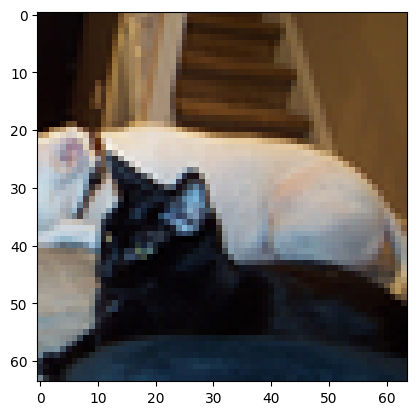

In [15]:



#problems: 1582, 210

plt.imshow(images[2500])

In [16]:
len(images)

4530

In [17]:
print(id_bbox_filename[1582])

[232118, [0, 90, 268, 268], '000000232118.jpg']


In [18]:
PIC_DIR = f'C:\\Users\Dedhal\source\\repos\cats\\'

subdir = ["CAT_00", "CAT_01", "CAT_02", "CAT_03", "CAT_04", "CAT_05", "CAT_06"]

WIDTH = 64
HEIGHT = 64

os.listdir(PIC_DIR)
for sd in subdir:
    for el in os.listdir(PIC_DIR + sd):
        if ".jpg" in el:
            pic = Image.open(PIC_DIR + sd + '\\' + el)
            pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
            pic = ImageOps.fit(pic, (64,64))
            #images.append(np.array(pic).astype(float) / 255.0)
            images.append(pic)

C:\Users\Dedhal\AppData\Local\Temp\ipykernel_43840\2923229429.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)


In [19]:
import random

for i in range(0, int(len(images) * 0.2)):
    select = random.randrange(0, len(images))
    #pic = Image.fromarray(np.uint8(images[select] * 255))
    pic = images[select]
    pic = ImageOps.mirror(pic)
    #images.append(np.array(pic).astype(float) / 255.0)
    images.append(pic)

In [20]:
print(len(images))

17432


In [22]:
#PATH = f'C:\\Users\Dedhal\source\\repos\preprocessed_cats\\'
#
#cat = images[1012]
#cat.save(PATH + str(i) + ".jpg")

In [23]:
##savez_compressed('cats_64_64.npz', images)
PATH = f'C:\\Users\Dedhal\source\\repos\preprocessed_cats\\'

for i, cat in enumerate(images):
    cat.save(PATH + str(i) + ".jpg")